<a href="https://colab.research.google.com/github/Satwik-1234/Gooble-collab-Scripts-/blob/main/Overtopping_breach_Plots_Bori_Dam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Overtopping breach hydrograph.xlsx to Overtopping breach hydrograph (1).xlsx


In [2]:
!pip install plotly --quiet
import pandas as pd
import plotly.graph_objects as go


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_excel("/content/Overtopping breach hydrograph.xlsx")
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()
# Convert 'Date and time' column to datetime objects, coercing errors to NaT
df["Date and time"] = pd.to_datetime(df["Date and time"], format='mixed', errors='coerce')

# **OUTPUT 1: STUDIO-QUALITY STATIC GRAPH (MATPLOTLIB)**
Overtopping Breach Hydrograph – Kurnur (Bori) Dam

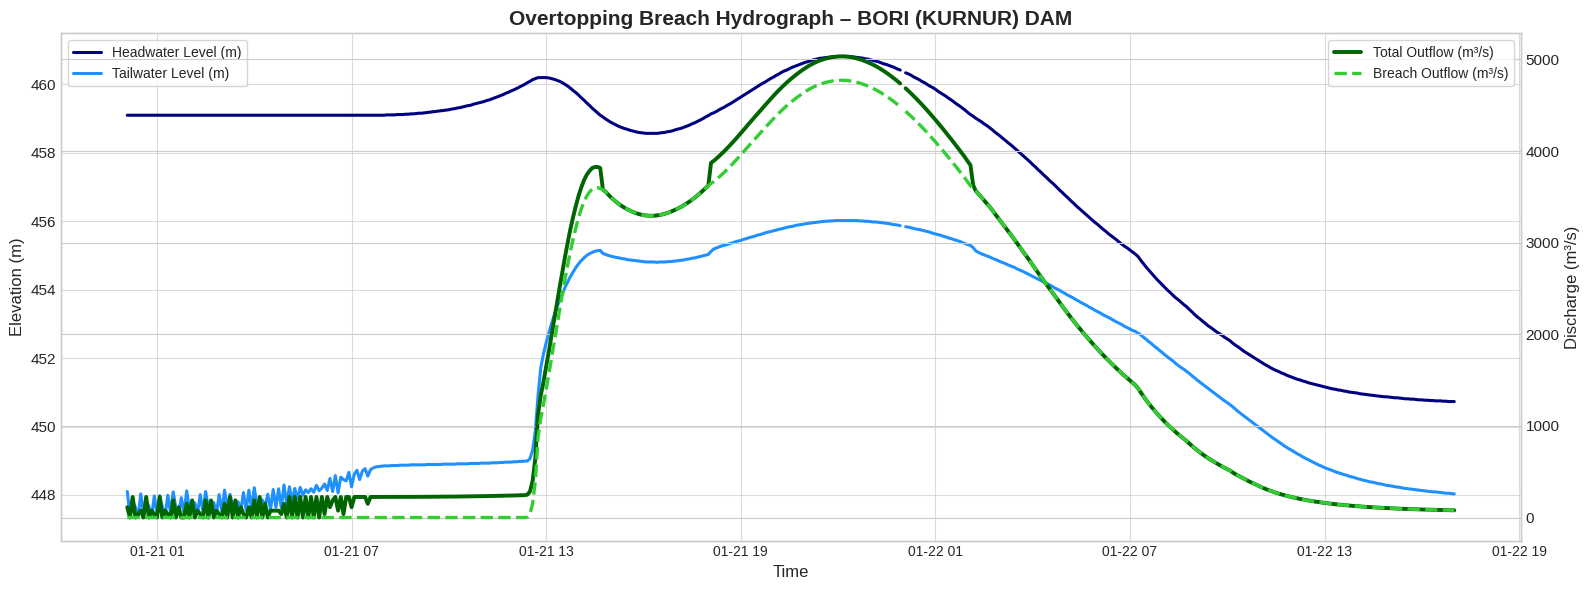

In [25]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(16, 6))

# -----------------------------
# LEFT Y-AXIS : WATER LEVELS
# -----------------------------
ax1.plot(
    df["Date and time"], df["stage HW elevation"],
    color="navy", linewidth=2.2,
    label="Headwater Level (m)"
)

ax1.plot(
    df["Date and time"], df["stage TW elevation"],
    color="dodgerblue", linewidth=2.2,
    label="Tailwater Level (m)"
)

ax1.set_ylabel("Elevation (m)", fontsize=12)
ax1.tick_params(axis="y", labelsize=11)

# -----------------------------
# RIGHT Y-AXIS : DISCHARGE
# -----------------------------
ax2 = ax1.twinx()

ax2.plot(
    df["Date and time"], df["TOTAL flow CMS"],
    color="darkgreen", linewidth=2.8,
    label="Total Outflow (m³/s)"
)

ax2.plot(
    df["Date and time"], df["Breach Flow CMS"],
    color="limegreen", linewidth=2.4, linestyle="--",
    label="Breach Outflow (m³/s)"
)

ax2.set_ylabel("Discharge (m³/s)", fontsize=12)
ax2.tick_params(axis="y", labelsize=11)

# -----------------------------
# X-AXIS FORMATTING (LIKE IMAGE)
# -----------------------------
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H"))

ax1.set_xlabel("Time", fontsize=12)
ax1.tick_params(axis="x", labelsize=10)

# -----------------------------
# TITLE (MATCHING STYLE)
# -----------------------------
ax1.set_title(
    "Overtopping Breach Hydrograph – BORI (KURNUR) DAM",
    fontsize=15, fontweight="bold"
)

# -----------------------------
# LEGENDS (LEFT & RIGHT, SAME AS IMAGE)
# -----------------------------
ax1.legend(
    loc="upper left",
    fontsize=10,
    frameon=True
)

ax2.legend(
    loc="upper right",
    fontsize=10,
    frameon=True
)

# -----------------------------
# GRID & LAYOUT
# -----------------------------
ax1.grid(True, which="major", linestyle="-", linewidth=0.8, alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
# ===============================
# LOAD EXCEL FILE
# ===============================
file_path = "/content/Overtopping breach hydrograph.xlsx"  # change if filename differs

df = pd.read_excel(file_path)

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Convert 'Date and time' column to datetime objects, coercing errors to NaT
df["Date and time"] = pd.to_datetime(df["Date and time"], format='mixed', errors='coerce')

df.head()

,ordinate,Date and time,stage HW elevation,stage TW elevation,TOTAL flow CMS,Breach Flow CMS
0,1,NaT,139.93,446.50,0.00,0.0
1,2,2026-01-21 00:05:00,459.10,448.10,112.24,0.0
2,3,2026-01-21 00:10:00,459.10,447.41,0.00,0.0
3,4,2026-01-21 00:15:00,459.10,447.80,224.54,0.0
4,5,2026-01-21 00:20:00,459.10,447.65,0.00,0.0


## **OUTPUT 2: INTERACTIVE STUDIO GRAPH (Plotly)**

In [31]:
!pip install plotly --quiet
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_excel("/content/Overtopping breach hydrograph.xlsx")
# Clean column names by stripping whitespace (already done in F22P_SUAILVk, but good to ensure here too)
df.columns = df.columns.str.strip()
df["Date and time"] = pd.to_datetime(df["Date and time"], format='mixed', errors='coerce')

# Create figure with secondary y-axis
fig = go.Figure()

# Headwater level
fig.add_trace(go.Scatter(
    x=df["Date and time"],
    y=df["stage HW elevation"],
    name="Headwater Level (m)",
    mode="lines",
    line=dict(color="darkblue", width=2.5),
    yaxis="y1"
))

# Tailwater level
fig.add_trace(go.Scatter(
    x=df["Date and time"],
    y=df["stage TW elevation"],
    name="Tailwater Level (m)",
    mode="lines",
    line=dict(color="deepskyblue", width=2.5),
    yaxis="y1"
))

# Total outflow
fig.add_trace(go.Scatter(
    x=df["Date and time"],
    y=df["TOTAL flow CMS"],
    name="Total Outflow (m³/s)",
    mode="lines",
    line=dict(color="darkgreen", width=3),
    yaxis="y2"
))

# Breach outflow
fig.add_trace(go.Scatter(
    x=df["Date and time"],
    y=df["Breach Flow CMS"],
    name="Breach Outflow (m³/s)",
    mode="lines",
    line=dict(color="limegreen", width=2.5, dash="dash"),
    yaxis="y2"
))

# Layout formatting (engineering grade)
fig.update_layout(
    title="Overtopping Breach Hydrograph – (Kurnur) BORI DAM",
    template="plotly_white",
    height=550,
    hovermode="x unified",

    xaxis=dict(
        title="Time",
        showgrid=True,
        tickfont=dict(size=12)
    ),

    yaxis=dict(
        title="Elevation (m)",
        showgrid=True,
        tickfont=dict(size=12)
    ),

    yaxis2=dict(
        title="Discharge (m³/s)",
        overlaying="y",
        side="right",
        showgrid=False,
        tickfont=dict(size=12)
    ),

    legend=dict(
        orientation="h",    # Horizontal orientation
        yanchor="bottom",   # Anchor at the bottom of the legend box
        y=1.02,             # Position below the title, relative to the plot area
        xanchor="left",     # Anchor at the left of the legend box
        x=0                 # Place at the far left
    )
)

fig.show()

In [16]:
peak_hw = df.loc[df["stage HW elevation"].idxmax()]

fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=df["Date and time"], y=df["stage HW elevation"],
    name="Headwater Elevation (m)",
    line=dict(color="navy", width=3)
))

fig1.add_trace(go.Scatter(
    x=df["Date and time"], y=df["stage TW elevation"],
    name="Tailwater Elevation (m)",
    line=dict(color="deepskyblue", width=3)
))

fig1.add_trace(go.Scatter(
    x=[peak_hw["Date and time"]],
    y=[peak_hw["stage HW elevation"]],
    mode="markers",
    marker=dict(color="red", size=9),
    name="Peak Reservoir Level"
))

fig1.add_annotation(
    x=peak_hw["Date and time"],
    y=peak_hw["stage HW elevation"],
    text=f"Peak HW Level = {peak_hw['stage HW elevation']:.2f} m<br>{peak_hw['Date and time'].strftime('%d%b%Y %H%M')}",
    showarrow=True,
    arrowhead=2
)

fig1.add_annotation(
    x=0.5, y=0.15, xref="paper", yref="paper",
    text=(
        "<b>Hydraulic Interpretation</b><br>"
        "• Overtopping initiates when reservoir exceeds dam crest<br>"
        "• Headwater controls erosion intensity on downstream face<br>"
        "• Tailwater moderates discharge capacity and breach growth"
    ),
    showarrow=False,
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="black",
    borderwidth=1
)

fig1.update_layout(
    title="<b>Reservoir Water Level Variation During Overtopping Breach</b>"
          "<br>Kurnur (Bori) Dam, Solapur",
    template="plotly_white",
    height=540,
    xaxis=dict(title="Time", tickfont=dict(size=12)),
    yaxis=dict(title="Elevation (m)", tickfont=dict(size=12)),
    legend=dict(
        x=1.05, y=0.5,
        xanchor="left",
        yanchor="middle",
        bordercolor="black",
        borderwidth=1
    )
)

fig1.show()

In [17]:
peak_q = df.loc[df["Breach Flow CMS"].idxmax()]

fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=df["Date and time"], y=df["TOTAL flow CMS"],
    name="Total Outflow (m³/s)",
    line=dict(color="darkgreen", width=3.5)
))

fig2.add_trace(go.Scatter(
    x=df["Date and time"], y=df["Breach Flow CMS"],
    name="Breach Outflow (m³/s)",
    line=dict(color="limegreen", width=3, dash="dash")
))

fig2.add_trace(go.Scatter(
    x=[peak_q["Date and time"]],
    y=[peak_q["Breach Flow CMS"]],
    mode="markers",
    marker=dict(color="red", size=9),
    name="Peak Breach Discharge"
))

fig2.add_annotation(
    x=peak_q["Date and time"],
    y=peak_q["Breach Flow CMS"],
    text=f"Peak Breach Discharge = {peak_q['Breach Flow CMS']:.1f} m³/s<br>{peak_q['Date and time'].strftime('%d%b%Y %H%M')}",
    showarrow=True,
    arrowhead=2
)

fig2.add_annotation(
    x=0.5, y=0.18, xref="paper", yref="paper",
    text=(
        "<b>Engineering Significance</b><br>"
        "• Rapid increase indicates downstream face erosion<br>"
        "• Peak discharge governs flood wave severity<br>"
        "• Critical input for downstream routing & EAP"
    ),
    showarrow=False,
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="black",
    borderwidth=1
)

fig2.update_layout(
    title="<b>Overtopping Breach Discharge Hydrograph</b>"
          "<br>Kurnur (Bori) Dam, Solapur",
    template="plotly_white",
    height=540,
    xaxis=dict(title="Time", tickfont=dict(size=12)),
    yaxis=dict(title="Discharge (m³/s)", tickfont=dict(size=12)),
    legend=dict(
        x=1.05, y=0.5,
        xanchor="left",
        yanchor="middle",
        bordercolor="black",
        borderwidth=1
    )
)

fig2.show()